In [ ]:
from sklearn.pipeline import Pipeline
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, \
RocCurveDisplay, roc_auc_score, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB, GaussianNB


In [8]:
iris = pd.read_csv('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Datasets/iris.csv')

In [9]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
le = LabelEncoder()
iris.Species = le.fit_transform(iris.Species)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
x, y = iris.drop('Species', axis = 1), iris.Species

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=25, test_size=0.3, stratify=y)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)
y_pred_proba = lda.predict_proba(x_test)

print(log_loss(y_test, y_pred_proba))
print(accuracy_score(y_test, y_pred))

0.0851320988864543
0.9555555555555556


In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
y_pred = qda.predict(x_test)
y_pred_proba = qda.predict_proba(x_test)

print(log_loss(y_test, y_pred_proba))
print(accuracy_score(y_test, y_pred))

0.04237087790419334
0.9777777777777777


#### LDA as Data Transformer

In [ ]:
import ipywidgets as widgets
import seaborn as sns

iris = pd.read_csv('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Datasets/iris.csv')

features = iris.drop('Species', axis = 1)

def plot(col1, col2):
    sns.scatterplot(data=iris, x=col1, y = col2, hue = 'Species')
    plt.show()

widgets.interact(plot, col1 = features, col2 = features)

interactive(children=(Dropdown(description='col1', options=('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Pe…

<function __main__.plot(col1, col2)>

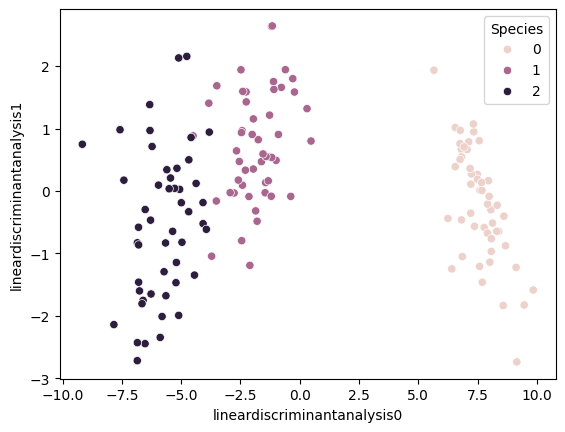

In [21]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
x, y = iris.drop('Species', axis = 1), iris.Species
lda_components = lda.fit_transform(x,y)
lda_components['Species'] = y
sns.scatterplot(data=lda_components, x='lineardiscriminantanalysis0', y='lineardiscriminantanalysis1', hue='Species')
plt.show()

In [22]:
lda_components

,lineardiscriminantanalysis0,lineardiscriminantanalysis1,Species
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0
...,...,...,...
145,-5.645003,-1.677717,2
146,-5.179565,0.363475,2
147,-4.967741,-0.821141,2
148,-5.886145,-2.345091,2


#### Vehicle Dataset

In [ ]:
# os.chdir('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Cases')
vehicle = pd.read_csv('../Cases/Vehicle_Silhouettes/Vehicle.csv', index_col=0)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

features = vehicle.drop('Class', axis = 1)

def plotVehicle(col1, col2):
    sns.scatterplot(data=vehicle, x=col1, y = col2, hue = 'Class')
    plt.show()

widgets.interact(plotVehicle, col1 = features, col2 = features)

interactive(children=(Dropdown(description='col1', options=('Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.R…

<function __main__.plotVehicle(col1, col2)>

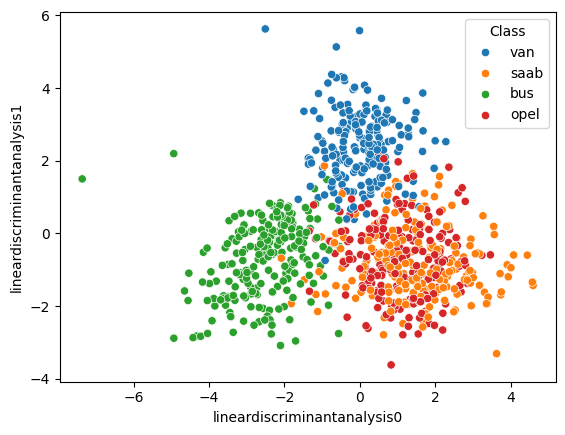

In [30]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
x, y = vehicle.drop('Class', axis = 1), vehicle.Class
lda_components = lda.fit_transform(x,y)
lda_components['Class'] = y
sns.scatterplot(data=lda_components, x='lineardiscriminantanalysis0', y='lineardiscriminantanalysis1', hue='Class')
plt.show()

In [31]:
x

,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
Comp,,,,,,,,,,,,,,,,,
95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201


In [32]:
lda_components

,lineardiscriminantanalysis0,lineardiscriminantanalysis1,lineardiscriminantanalysis2,Class
Comp,,,,
95,-1.105064,0.984128,0.083634,van
91,0.753882,2.526893,-1.012174,van
104,1.603487,-0.920502,-1.397713,saab
93,-0.336819,2.897922,0.989117,van
85,-4.936673,2.196956,-0.922233,bus
...,...,...,...,...
93,1.537811,-1.465532,-0.585613,saab
89,-0.437199,2.530474,-0.203120,van
106,3.063524,-0.559401,0.553334,saab
